<div style="display:block; margin-bottom:50px">
<h1 style="margin-bottom:25px; margin-top: 25px; font-size:3rem;color:#4c76ce;text-align:center;">
    Praktinis Projektas: Gapminder Duomenų Vizualizacija</h1>
    
<h2 style="margin-bottom: 25px;font-size:2.5rem;text-align:center;color:#8d1c1a;">
    1. Pirminė duomenų analizė
    </h2>
       
<img src="https://raw.githubusercontent.com/lajmcourses/Images/master/bokeh.png"
     style="position:absolute;top:5px;left:25px;height:150px;width:auto;margin-bottom:35px;">
</div>

In [1]:
import numpy as np
import pandas as pd

from bokeh.io.export import export_png
from bokeh.models import ColumnDataSource, Label, Title
from bokeh.plotting import figure,  output_notebook, show

from IPython.display import Image, display

output_notebook()

pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = 72
pd.options.display.max_rows = 300

# Set to False in order to enable plots interactivity
DISPLAY_PLOT_AS_IMAGE = True

Loading BokehJS ...

Šio projekto tikslai

1) Susipažinti su Python Bokeh duomenų vizualizacijos paketu;

2) Susipažinti su Gapminder dinaminėmis duomenų vizualizacijomis;

3) Išmokti dinaminių vizualizacijų pagrindus;

4) Atkartoti **Gapminder Reproduction** vizualizacija ir suprasti, kaip tokio tipo vizualizacijos yra kuriamos;

5) Išmokti dirbti su realiais duomenemis;

5) Išmokti paruošti duomenis analizei bei grafinei prezentacijai.


## 1. Analizės klausimai

1) Kokie duomenys yra reikalingi **Gapminder Reproduction** duomenų vizualizacijai atkurti?

2) Kokių duomenų trūksta?

3) Kokiu formatu turi būti pateikiami duomenys?

4) Kaip reikėtų pertvarkyti pirminius duomenis? 


## 2. Duomenys reikalingi Gapminder Reproduction vizualizacijai atkurti


1) Pasaulio šalių gyventojų gimstamumo duomenys

2) Pasaulio šalių gyventojų gyvenimo trukmės duomenys

3) Pasaulio šalių gyventojų skaičiaus duomenys

4) Pasaulio šalių kontinentai



## 3. Pirminių duomenų šaltinių analizė


### 3.1 Pasaulio šalys ir kontinentai

Tai yra pats papraščiausias mūsų projektui priklausantis duomenų rinkinys.

Šiame rinkinyje yra tos pasaulio šalys, kurias mes planuojame įtraukti į vizualizaciją.

In [2]:
# Pasaulio šalys ir kontinentai

df_countries = pd.read_csv("data/countries.csv")
df_countries.head()

,Country,ISO Codes,ISO2,ISO3,Continent
0,Afghanistan,AF / AFG,AF,AFG,Asia
1,Albania,AL / ALB,AL,ALB,Europe
2,Algeria,DZ / DZA,DZ,DZA,Africa
3,Andorra,AD / AND,AD,AND,Europe
4,Angola,AO / AGO,AO,AGO,Africa


In [3]:
# Nereikalingų stulpelių pašalinimas: ISO Codes
if "ISO Codes" in df_countries and "ISO2" in df_countries:
    df_countries.drop(columns=["ISO Codes", "ISO2"], inplace=True)

In [4]:
# Stulpelių pervadinima: 'ISO3' to 'Country Code', and 'Country' to 'Country Name'
if "ISO3" in df_countries and "Country" in df_countries:
    df_countries.rename({ 
        "ISO3": "Country Code",
        "Country": "Country Name"
        }, axis="columns", inplace=True)

df_countries.head()



,Country Name,Country Code,Continent
0,Afghanistan,AFG,Asia
1,Albania,ALB,Europe
2,Algeria,DZA,Africa
3,Andorra,AND,Europe
4,Angola,AGO,Africa


In [5]:
# Duomenų šaltinio apimtis 

nrows = df_countries.shape[0]
ncols = df_countries.shape[1]

print(f"Countries: {nrows} rows, {ncols} columns")

# Column names
print("Column names:", list(df_countries.columns))

Countries: 184 rows, 3 columns
Column names: ['Country Name', 'Country Code', 'Continent']


In [6]:
# Duomenų tipai

df_countries.dtypes

Country Name    object
Country Code    object
Continent       object
dtype: object

In [7]:
# Duomenų statistika

df_countries.describe()

,Country Name,Country Code,Continent
count,184,184,184
unique,184,184,6
top,Afghanistan,AFG,Africa
freq,1,1,49


### Save cleaned data to csv

In [8]:
df_countries.to_csv("cleaned_data/cd_countries.csv", sep=",", float_format='{:.2f}'.format, index=False)

### 3.2 Pasaulio šalių gimstamumas

In [9]:
# Pasaulio šalių gimstamumas

df_fertility = pd.read_csv("data/wb_fertility_rate.csv")
df_fertility.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.82,4.66,4.47,4.27,4.06,3.84,3.62,3.42,3.23,3.05,2.91,2.79,2.69,2.61,2.55,2.51,2.47,2.45,2.42,2.41,2.39,2.38,2.36,2.35,2.34,2.33,2.32,2.31,2.29,2.27,2.25,2.22,2.19,2.15,2.11,2.06,2.02,1.98,1.94,1.90,1.87,1.85,1.82,1.80,1.79,1.77,1.76,1.76,1.76,1.76,1.77,1.78,1.79,1.81,1.83,1.85,1.87,1.89,1.90,1.90,1.90
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.72,6.74,6.75,6.77,6.78,6.78,6.79,6.80,6.80,6.81,6.81,6.81,6.81,6.81,6.80,6.79,6.78,6.76,6.75,6.73,6.71,6.69,6.66,6.63,6.60,6.56,6.51,6.45,6.38,6.31,6.23,6.15,6.07,6.00,5.93,5.86,5.80,5.74,5.68,5.63,5.57,5.52,5.47,5.42,5.37,5.32,5.27,5.21,5.16,5.09,5.03,4.96,4.88,4.80,4.73,4.65,4.57,4.49,4.42,4.35,4.28
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.46,7.46,7.46,7.46,7.46,7.46,7.47,7.48,7.50,7.54,7.57,7.61,7.63,7.63,7.61,7.56,7.49,7.39,7.27,7.15,7.02,6.88,6.72,6.55,6.37,6.18,5.98,5.77,5.56,5.36,5.16,4.98,4.80,4.63,4.47,4.32,4.18
3,Africa Western and Central,AFW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.44,6.46,6.47,6.49,6.50,6.52,6.54,6.56,6.59,6.62,6.65,6.69,6.72,6.76,6.79,6.81,6.83,6.85,6.86,6.86,6.86,6.85,6.84,6.82,6.79,6.75,6.71,6.67,6.62,6.57,6.52,6.47,6.41,6.36,6.31,6.26,6.21,6.16,6.12,6.07,6.03,5.99,5.95,5.91,5.87,5.83,5.78,5.74,5.70,5.65,5.61,5.56,5.50,5.45,5.38,5.32,5.25,5.18,5.11,5.04,4.98
4,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.71,6.79,6.87,6.95,7.04,7.12,7.19,7.27,7.33,7.39,7.43,7.47,7.49,7.50,7.50,7.49,7.49,7.47,7.47,7.46,7.46,7.46,7.46,7.46,7.46,7.45,7.43,7.41,7.37,7.33,7.27,7.21,7.14,7.07,6.99,6.92,6.85,6.79,6.73,6.68,6.64,6.60,6.57,6.53,6.50,6.46,6.42,6.37,6.32,6.26,6.19,6.12,6.04,5.95,5.86,5.77,5.69,5.60,5.52,5.44,5.37


In [10]:
# Nereikalingų stulpelių pašalinimas: Indicator Name, Indicator Code

if "Indicator Name" in df_fertility and "Indicator Code" in df_fertility:
    df_fertility.drop(columns=["Indicator Name", "Indicator Code"], inplace=True)

df_fertility.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,4.82,4.66,4.47,4.27,4.06,3.84,3.62,3.42,3.23,3.05,2.91,2.79,2.69,2.61,2.55,2.51,2.47,2.45,2.42,2.41,2.39,2.38,2.36,2.35,2.34,2.33,2.32,2.31,2.29,2.27,2.25,2.22,2.19,2.15,2.11,2.06,2.02,1.98,1.94,1.90,1.87,1.85,1.82,1.80,1.79,1.77,1.76,1.76,1.76,1.76,1.77,1.78,1.79,1.81,1.83,1.85,1.87,1.89,1.90,1.90,1.90
1,Africa Eastern and Southern,AFE,6.72,6.74,6.75,6.77,6.78,6.78,6.79,6.80,6.80,6.81,6.81,6.81,6.81,6.81,6.80,6.79,6.78,6.76,6.75,6.73,6.71,6.69,6.66,6.63,6.60,6.56,6.51,6.45,6.38,6.31,6.23,6.15,6.07,6.00,5.93,5.86,5.80,5.74,5.68,5.63,5.57,5.52,5.47,5.42,5.37,5.32,5.27,5.21,5.16,5.09,5.03,4.96,4.88,4.80,4.73,4.65,4.57,4.49,4.42,4.35,4.28
2,Afghanistan,AFG,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.46,7.46,7.46,7.46,7.46,7.46,7.47,7.48,7.50,7.54,7.57,7.61,7.63,7.63,7.61,7.56,7.49,7.39,7.27,7.15,7.02,6.88,6.72,6.55,6.37,6.18,5.98,5.77,5.56,5.36,5.16,4.98,4.80,4.63,4.47,4.32,4.18
3,Africa Western and Central,AFW,6.44,6.46,6.47,6.49,6.50,6.52,6.54,6.56,6.59,6.62,6.65,6.69,6.72,6.76,6.79,6.81,6.83,6.85,6.86,6.86,6.86,6.85,6.84,6.82,6.79,6.75,6.71,6.67,6.62,6.57,6.52,6.47,6.41,6.36,6.31,6.26,6.21,6.16,6.12,6.07,6.03,5.99,5.95,5.91,5.87,5.83,5.78,5.74,5.70,5.65,5.61,5.56,5.50,5.45,5.38,5.32,5.25,5.18,5.11,5.04,4.98
4,Angola,AGO,6.71,6.79,6.87,6.95,7.04,7.12,7.19,7.27,7.33,7.39,7.43,7.47,7.49,7.50,7.50,7.49,7.49,7.47,7.47,7.46,7.46,7.46,7.46,7.46,7.46,7.45,7.43,7.41,7.37,7.33,7.27,7.21,7.14,7.07,6.99,6.92,6.85,6.79,6.73,6.68,6.64,6.60,6.57,6.53,6.50,6.46,6.42,6.37,6.32,6.26,6.19,6.12,6.04,5.95,5.86,5.77,5.69,5.60,5.52,5.44,5.37


### Duomenų redagavimas: Šalių kurių nėra Countries duomenų šaltinyje pašalinimas

In [11]:
# Šalių kurių nėra Countries duomenų šaltinyje pašalinimas

df_fertility = pd.merge(df_countries[["Country Code"]], df_fertility, on="Country Code", how="inner")
df_fertility.head()

,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,Afghanistan,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.46,7.46,7.46,7.46,7.46,7.46,7.47,7.48,7.50,7.54,7.57,7.61,7.63,7.63,7.61,7.56,7.49,7.39,7.27,7.15,7.02,6.88,6.72,6.55,6.37,6.18,5.98,5.77,5.56,5.36,5.16,4.98,4.80,4.63,4.47,4.32,4.18
1,ALB,Albania,6.49,6.40,6.28,6.13,5.96,5.77,5.58,5.39,5.22,5.06,4.91,4.78,4.64,4.51,4.37,4.24,4.10,3.97,3.84,3.73,3.62,3.53,3.45,3.38,3.32,3.27,3.22,3.16,3.11,3.05,2.98,2.90,2.83,2.75,2.67,2.59,2.51,2.42,2.33,2.25,2.16,2.07,1.98,1.90,1.82,1.75,1.70,1.67,1.65,1.65,1.66,1.67,1.68,1.69,1.69,1.68,1.66,1.64,1.62,1.60,1.58
2,DZA,Algeria,7.52,7.57,7.61,7.65,7.67,7.67,7.68,7.67,7.67,7.66,7.64,7.62,7.60,7.56,7.50,7.43,7.34,7.23,7.11,6.96,6.79,6.62,6.43,6.24,6.04,5.83,5.63,5.41,5.19,4.96,4.73,4.48,4.22,3.96,3.70,3.45,3.21,2.99,2.80,2.63,2.51,2.44,2.40,2.40,2.44,2.50,2.57,2.65,2.73,2.80,2.86,2.91,2.95,2.99,3.02,3.04,3.05,3.04,3.02,2.99,2.94
3,AND,Andorra,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.18,1.25,1.19,1.27,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25
4,AGO,Angola,6.71,6.79,6.87,6.95,7.04,7.12,7.19,7.27,7.33,7.39,7.43,7.47,7.49,7.50,7.50,7.49,7.49,7.47,7.47,7.46,7.46,7.46,7.46,7.46,7.46,7.45,7.43,7.41,7.37,7.33,7.27,7.21,7.14,7.07,6.99,6.92,6.85,6.79,6.73,6.68,6.64,6.60,6.57,6.53,6.50,6.46,6.42,6.37,6.32,6.26,6.19,6.12,6.04,5.95,5.86,5.77,5.69,5.60,5.52,5.44,5.37


In [12]:
# Duomenų šaltinio dydis 

nrows = df_fertility.shape[0]
ncols = df_fertility.shape[1]

print(f"Fertility: {nrows} rows, {ncols} columns")

Fertility: 184 rows, 63 columns


In [13]:
# Bazinė skaitmeninių duomenų statistika

df_fertility.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00
mean,5.39,5.39,5.38,5.36,5.34,5.30,5.25,5.22,5.17,5.13,5.08,5.03,4.97,4.90,4.85,4.79,4.73,4.67,4.62,4.58,4.53,4.48,4.43,4.37,4.32,4.26,4.20,4.14,4.08,4.01,3.95,3.87,3.79,3.71,3.63,3.56,3.49,3.42,3.35,3.30,3.25,3.19,3.14,3.11,3.07,3.04,3.02,2.99,2.98,2.95,2.92,2.88,2.86,2.82,2.79,2.76,2.73,2.69,2.66,2.63,2.61
std,1.83,1.83,1.85,1.86,1.87,1.90,1.92,1.92,1.94,1.95,1.97,1.97,1.99,2.02,2.02,2.03,2.04,2.06,2.07,2.06,2.06,2.06,2.06,2.05,2.04,2.02,2.00,1.98,1.94,1.92,1.90,1.88,1.86,1.85,1.84,1.82,1.81,1.79,1.78,1.76,1.73,1.72,1.70,1.68,1.65,1.62,1.59,1.56,1.52,1.50,1.47,1.45,1.42,1.39,1.36,1.33,1.30,1.28,1.26,1.24,1.19
min,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.19,1.16,1.14,1.09,1.09,1.13,1.12,1.08,1.09,1.17,1.16,1.08,1.13,1.18,1.19,1.15,1.15,1.20,1.25,1.19,1.21,1.24,1.17,1.05,0.98,0.92,1.08
25%,3.80,3.75,3.68,3.61,3.51,3.48,3.39,3.34,3.28,3.17,3.05,2.99,2.99,2.83,2.71,2.69,2.55,2.48,2.45,2.43,2.35,2.32,2.28,2.27,2.24,2.23,2.20,2.20,2.16,2.16,2.11,2.08,2.06,2.01,1.94,1.88,1.89,1.84,1.79,1.77,1.77,1.74,1.75,1.76,1.78,1.77,1.79,1.80,1.81,1.81,1.80,1.76,1.73,1.73,1.73,1.72,1.73,1.69,1.68,1.66,1.71
50%,6.16,6.17,6.17,6.15,6.08,5.97,5.98,5.97,5.91,5.80,5.72,5.60,5.50,5.36,5.31,5.21,5.15,5.07,5.02,4.89,4.78,4.62,4.48,4.35,4.27,4.19,4.07,4.00,3.90,3.75,3.59,3.54,3.46,3.28,3.20,3.10,3.03,2.98,2.91,2.85,2.77,2.69,2.64,2.60,2.56,2.51,2.49,2.50,2.48,2.45,2.35,2.33,2.34,2.30,2.28,2.30,2.28,2.26,2.23,2.20,2.19
75%,6.79,6.80,6.81,6.81,6.80,6.80,6.80,6.75,6.74,6.71,6.70,6.67,6.69,6.67,6.63,6.61,6.61,6.57,6.54,6.49,6.48,6.45,6.39,6.30,6.26,6.19,6.04,5.96,5.83,5.71,5.54,5.39,5.30,5.13,5.02,4.94,4.81,4.64,4.59,4.53,4.49,4.38,4.27,4.21,4.13,4.04,4.03,4.01,4.00,3.97,3.92,3.87,3.82,3.77,3.72,3.69,3.65,3.61,3.57,3.52,3.48
max,8.19,8.19,8.20,8.20,8.20,8.20,8.20,8.22,8.28,8.33,8.39,8.43,8.47,8.50,8.53,8.55,8.58,8.61,8.64,8.67,8.71,8.75,8.79,8.83,8.85,8.86,8.86,8.83,8.79,8.71,8.61,8.46,8.27,8.05,7.79,7.72,7.72,7.71,7.70,7.69,7.68,7.67,7.66,7.64,7.63,7.61,7.59,7.57,7.54,7.51,7.47,7.43,7.38,7.31,7.25,7.17,7.09,7.00,6.91,6.82,6.74


In [14]:
# Bazinė kategorinių duomenų statistika

df_fertility.describe(include=object)

,Country Code,Country Name
count,184,184
unique,184,184
top,AFG,Afghanistan
freq,1,1


### Save cleaned data to csv file

In [15]:
df_fertility.to_csv("cleaned_data/cd_fertility.csv", sep=",", float_format="{:.2f}".format, index=False)

### 3.3 Pasaulio šalių gyventojų gyvenimo ilgis

In [16]:
# Pasaulio šalių gyventojų gyvenimo ilgis

df_life_expectancy = pd.read_csv("data/wb_life-expectancy.csv")


In [17]:
# Nereikalingų stulpelių pašalinimas: Indicator Name, Indicator Code

if "Indicator Name" in df_life_expectancy and "Indicator Code" in df_life_expectancy:
    df_life_expectancy.drop(columns=["Indicator Name", "Indicator Code"], inplace=True)

df_life_expectancy.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,65.66,66.07,66.44,66.79,67.11,67.44,67.76,68.09,68.44,68.78,69.14,69.50,69.85,70.19,70.52,70.83,71.14,71.44,71.74,72.02,72.29,72.54,72.75,72.93,73.07,73.18,73.26,73.33,73.38,73.42,73.47,73.51,73.54,73.57,73.60,73.62,73.65,73.67,73.70,73.74,73.79,73.85,73.94,74.04,74.16,74.29,74.43,74.58,74.72,74.87,75.02,75.16,75.30,75.44,75.58,75.72,75.87,76.01,76.15,76.29,76.43
1,Africa Eastern and Southern,AFE,42.72,43.17,43.60,44.03,44.43,44.83,45.21,45.59,45.97,46.35,46.73,47.10,47.47,47.83,48.17,48.50,48.81,49.10,49.37,49.62,49.87,50.12,50.36,50.61,50.85,51.06,51.21,51.30,51.31,51.25,51.15,51.05,50.96,50.89,50.84,50.81,50.80,50.82,50.90,51.04,51.28,51.61,52.04,52.59,53.23,53.97,54.79,55.68,56.61,57.55,58.47,59.35,60.19,60.95,61.65,62.26,62.79,63.25,63.65,64.01,64.33
2,Afghanistan,AFG,32.45,32.96,33.47,33.97,34.46,34.95,35.43,35.91,36.40,36.90,37.41,37.93,38.46,39.00,39.56,40.13,40.72,41.32,41.94,42.59,43.24,43.92,44.62,45.32,46.04,46.76,47.49,48.21,48.93,49.64,50.33,51.00,51.64,52.26,52.84,53.40,53.92,54.42,54.91,55.38,55.84,56.31,56.78,57.27,57.77,58.29,58.83,59.38,59.93,60.48,61.03,61.55,62.05,62.52,62.97,63.38,63.76,64.13,64.49,64.83,65.17
3,Africa Western and Central,AFW,37.21,37.63,38.05,38.46,38.87,39.26,39.66,40.07,40.48,40.91,41.37,41.84,42.33,42.83,43.34,43.86,44.37,44.89,45.40,45.90,46.37,46.80,47.19,47.53,47.83,48.08,48.28,48.45,48.60,48.72,48.82,48.89,48.92,48.93,48.93,48.91,48.90,48.91,48.96,49.05,49.22,49.48,49.82,50.24,50.73,51.28,51.87,52.46,53.05,53.61,54.14,54.65,55.14,55.62,56.09,56.54,56.97,57.38,57.76,58.12,58.45
4,Angola,AGO,37.52,37.81,38.11,38.43,38.76,39.10,39.45,39.81,40.18,40.55,40.91,41.28,41.65,42.02,42.37,42.72,43.05,43.37,43.66,43.93,44.18,44.40,44.61,44.80,44.97,45.11,45.21,45.28,45.32,45.32,45.31,45.27,45.23,45.20,45.20,45.25,45.35,45.52,45.76,46.09,46.52,47.06,47.70,48.44,49.26,50.16,51.14,52.18,53.24,54.31,55.35,56.33,57.24,58.05,58.78,59.40,59.92,60.38,60.78,61.15,61.49


### Duomenų redagavimas: Šalių kurių nėra Countries duomenų šaltinyje pašalinimas

In [18]:
# Šalių kurių nėra Countries duomenų šaltinyje pašalinimas

df_life_expectancy = pd.merge(df_countries[["Country Code"]], df_life_expectancy, on="Country Code", how="inner")
df_life_expectancy.head()

,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,Afghanistan,32.45,32.96,33.47,33.97,34.46,34.95,35.43,35.91,36.40,36.90,37.41,37.93,38.46,39.00,39.56,40.13,40.72,41.32,41.94,42.59,43.24,43.92,44.62,45.32,46.04,46.76,47.49,48.21,48.93,49.64,50.33,51.00,51.64,52.26,52.84,53.40,53.92,54.42,54.91,55.38,55.84,56.31,56.78,57.27,57.77,58.29,58.83,59.38,59.93,60.48,61.03,61.55,62.05,62.52,62.97,63.38,63.76,64.13,64.49,64.83,65.17
1,ALB,Albania,62.28,63.30,64.19,64.91,65.46,65.85,66.11,66.30,66.49,66.69,66.94,67.24,67.58,67.95,68.34,68.74,69.11,69.45,69.74,69.99,70.21,70.42,70.64,70.88,71.13,71.39,71.61,71.76,71.84,71.86,71.84,71.80,71.80,71.86,71.99,72.20,72.50,72.84,73.21,73.59,73.95,74.29,74.58,74.83,75.04,75.23,75.42,75.65,75.91,76.22,76.56,76.91,77.25,77.55,77.81,78.03,78.19,78.33,78.46,78.57,78.67
2,DZA,Algeria,46.14,46.60,47.06,47.51,47.96,48.39,48.81,49.21,49.60,49.98,50.37,50.77,51.20,51.68,52.22,52.87,53.66,54.61,55.70,56.91,58.20,59.52,60.81,62.03,63.13,64.09,64.88,65.55,66.10,66.55,66.94,67.27,67.58,67.88,68.19,68.54,68.92,69.32,69.75,70.18,70.64,71.12,71.61,72.10,72.59,73.07,73.52,73.94,74.31,74.64,74.94,75.20,75.44,75.66,75.88,76.09,76.30,76.50,76.69,76.88,77.06
3,AND,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,37.52,37.81,38.11,38.43,38.76,39.10,39.45,39.81,40.18,40.55,40.91,41.28,41.65,42.02,42.37,42.72,43.05,43.37,43.66,43.93,44.18,44.40,44.61,44.80,44.97,45.11,45.21,45.28,45.32,45.32,45.31,45.27,45.23,45.20,45.20,45.25,45.35,45.52,45.76,46.09,46.52,47.06,47.70,48.44,49.26,50.16,51.14,52.18,53.24,54.31,55.35,56.33,57.24,58.05,58.78,59.40,59.92,60.38,60.78,61.15,61.49


In [19]:
# Duomenų šaltinio apimtis 

nrows = df_life_expectancy.shape[0]
ncols = df_life_expectancy.shape[1]

print(f"Life Expectancy: {nrows} rows, {ncols} columns")


Life Expectancy: 184 rows, 63 columns


### Trūkstami duomenis

In [20]:
# Bazinė skaitmeninių duomenų statistika

df_life_expectancy.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,172.00,173.00,173.00,172.00,172.00,172.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,174.00,174.00,175.00,174.00,174.00,174.00,174.00,175.00,174.00,174.00,176.00,176.00,176.00,175.00,176.00,177.00,176.00,178.00,176.00,176.00,178.00,177.00,178.00,177.00,177.00,178.00,177.00,177.00,177.00,177.00,177.00,177.00,178.00,177.00,177.00,177.00,177.00,177.00,177.00,177.00,176.00
mean,53.68,54.26,54.64,54.98,55.45,55.85,56.35,56.74,57.11,57.46,57.87,58.24,58.62,58.99,59.36,59.72,60.11,60.49,60.85,61.23,61.64,62.04,62.47,62.76,63.12,63.43,63.77,64.08,64.26,64.47,64.67,64.84,64.99,65.02,65.26,65.44,65.65,65.96,66.11,66.36,66.67,66.96,67.27,67.51,67.89,68.20,68.55,68.91,69.31,69.70,70.07,70.47,70.89,71.15,71.48,71.73,72.01,72.24,72.45,72.65,72.81
std,12.24,12.25,12.11,12.00,11.97,11.84,11.77,11.65,11.51,11.36,11.28,11.19,11.13,11.07,11.04,11.02,11.00,10.94,10.81,10.66,10.45,10.29,10.14,9.99,9.90,9.80,9.78,9.76,9.78,9.86,9.89,10.00,10.10,10.13,10.19,10.12,10.13,10.10,10.12,10.12,10.08,10.13,10.06,9.97,9.92,9.73,9.58,9.37,9.16,8.94,8.72,8.54,8.37,8.15,8.02,7.81,7.70,7.59,7.49,7.39,7.33
min,28.20,28.34,28.54,28.78,29.10,29.49,29.96,30.50,31.09,31.72,32.39,33.08,33.78,32.67,28.04,23.59,20.32,18.91,19.73,22.74,27.54,33.34,39.16,39.67,40.01,40.38,40.15,39.83,39.44,38.44,33.41,29.25,26.69,26.17,27.74,31.04,35.38,37.50,37.98,38.63,39.44,40.37,41.38,42.42,43.06,42.66,42.59,42.85,43.38,44.15,45.10,46.21,47.42,48.66,49.89,50.88,51.59,52.24,52.80,53.28,53.68
25%,43.50,44.05,44.78,45.26,45.85,46.54,47.41,48.14,48.69,49.01,49.25,49.62,49.91,50.21,50.51,51.23,52.04,52.45,52.79,53.24,53.68,54.01,54.44,54.61,54.81,55.22,55.77,56.20,56.49,57.01,57.39,57.37,57.52,57.91,58.05,58.48,58.67,59.12,59.01,58.95,59.31,59.49,60.02,60.50,61.06,61.41,61.65,62.13,62.68,63.09,63.52,64.52,65.31,65.72,66.14,66.55,66.77,66.95,67.11,67.27,67.47
50%,54.31,54.90,55.33,55.80,56.23,56.66,57.48,58.02,58.75,59.47,59.66,60.30,60.84,61.14,61.87,62.14,63.01,63.26,63.46,63.78,64.17,64.53,65.20,65.37,65.81,66.35,66.84,67.16,67.51,67.93,68.07,68.04,68.05,67.88,68.03,68.45,68.75,69.03,69.04,69.51,70.06,70.26,70.86,71.03,71.46,71.30,71.44,71.67,72.02,72.17,72.14,72.57,72.81,72.76,72.97,73.25,73.54,73.74,73.89,74.05,74.13
75%,64.64,65.13,65.41,65.78,66.20,66.62,67.26,67.45,67.67,67.87,68.16,68.50,68.73,69.01,69.25,69.29,69.45,69.74,69.74,69.98,70.16,70.40,70.66,70.62,70.85,71.08,71.48,71.57,71.48,71.61,71.61,71.81,72.01,72.25,72.46,72.65,72.87,73.18,73.48,73.78,73.95,74.29,74.68,74.61,75.04,75.15,75.30,75.38,75.54,75.70,76.03,76.23,76.60,76.90,77.03,77.28,77.47,77.63,77.63,77.86,78.06
max,73.55,73.65,73.72,73.56,73.73,73.87,74.08,74.12,74.01,74.08,74.65,74.62,74.72,74.87,74.98,75.58,76.97,76.37,76.65,76.77,76.85,76.52,77.04,76.96,77.58,77.65,78.06,78.48,78.40,78.82,78.84,79.10,79.15,79.29,79.69,79.54,80.20,80.42,80.50,80.57,81.08,81.42,81.56,81.76,82.03,81.93,82.32,82.51,82.68,82.93,82.84,82.70,85.42,83.33,83.59,83.79,83.98,84.10,84.21,84.36,84.65


In [21]:
# Bazinė kategorinių duomenų statistika

df_life_expectancy.describe(include=object)

,Country Code,Country Name
count,184,184
unique,184,184
top,AFG,Afghanistan
freq,1,1


### Trūkstami duomenys

In [22]:
# Šalys su trūkstamais gyvenimo ilgio įrašais

display_missing_records=True

countries_with_missing_le = []
number_of_countries_with_le_missing = 0

for code in df_life_expectancy["Country Code"]:
    country_filter = (df_life_expectancy["Country Code"] == code)
    if df_life_expectancy[country_filter].loc[:, "1960":"2020"].isna().values.any():
        if display_missing_records:
            display(df_life_expectancy[country_filter])

        number_of_countries_with_le_missing += 1
        countries_with_missing_le.append(code)
        

,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
3,AND,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
43,DMA,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.46,NaN,NaN,NaN,NaN,71.96,NaN,NaN,NaN,NaN,73.95,NaN,NaN,NaN,NaN,75.95,NaN,NaN,NaN,NaN,76.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
75,ISR,Israel,NaN,72.01,72.11,NaN,NaN,NaN,72.29,71.51,71.06,70.97,71.21,71.72,71.08,71.69,71.66,72.05,72.96,72.96,73.21,73.51,73.88,74.26,74.11,74.46,74.81,75.21,74.96,75.26,74.44,76.31,76.61,76.76,76.50,77.15,77.40,77.45,78.10,78.00,78.15,78.66,78.95,79.41,79.45,79.65,80.15,80.15,80.55,80.50,80.95,81.40,81.60,81.66,81.70,82.06,82.15,82.05,82.41,82.55,82.80,82.80,83.03


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
91,LIE,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.42,77.39,76.84,76.05,77.75,79.11,76.83,79.28,79.64,79.96,81.77,80.67,80.95,81.30,82.68,81.50,81.84,81.79,82.38,82.26,82.07,82.66,82.26,83.75,83.04,83.04,NaN


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
105,MCO,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
112,NRU,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
123,PLW,Palau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.07,NaN,NaN,NaN,NaN,71.84,NaN,NaN,NaN,NaN,70.49,NaN,NaN,NaN,NaN,69.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
124,PSE,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.05,68.43,68.80,69.14,69.45,69.76,70.04,70.31,70.56,70.80,71.02,71.24,71.45,71.65,71.84,72.03,72.20,72.37,72.52,72.66,72.79,72.92,73.04,73.17,73.30,73.44,73.59,73.74,73.89,74.05,74.20


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
140,SMR,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
143,SRB,Serbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.49,NaN,NaN,NaN,NaN,NaN,72.04,NaN,NaN,71.58,72.23,72.29,72.44,72.68,72.83,73.39,73.63,73.89,73.99,74.34,74.54,74.84,75.19,75.34,75.29,75.69,75.54,75.89,75.69,76.09


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
144,SYC,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.60,70.19,69.32,70.38,69.55,69.70,68.66,68.24,68.70,67.97,68.11,70.71,71.21,69.47,70.73,72.48,71.56,71.21,71.75,72.67,72.78,73.25,71.09,71.03,72.66,72.13,72.22,73.14,73.16,73.08,73.20,72.72,74.28,73.12,73.23,74.30,74.31,74.30,72.84,73.94,73.63


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
170,TUV,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Trūkstamų įrašų suvestinė

print("Number of countries with missing life expectancy entries:", number_of_countries_with_le_missing)
print("List of countries with missing life expectancy entries:\n", countries_with_missing_le)

Number of countries with missing life expectancy entries: 12
List of countries with missing life expectancy entries:
 ['AND', 'DMA', 'ISR', 'LIE', 'MCO', 'NRU', 'PLW', 'PSE', 'SMR', 'SRB', 'SYC', 'TUV']


## Trūkstamų duomenų papildymo strategija

1) Surasti šalių įrašus, kur trūksta gyvenimo ilgio duomenų už 2020 metus.

2) Įrašyti trūkstamą 2020 metų gyvenimo ilgio statistiką.

3) Užpildyti visus likusius gyvenimo trukmės trūkstamus įrašus panaudojant bfill opciją.

In [24]:
# Trūkstamų gyvenimo trukmės įrašų suradymas už 2020 metus

display_missing_records=True

countries_with_missing_le = []
number_of_countries_with_le_missing = 0

for code in df_life_expectancy["Country Code"]:
    country_filter = (df_life_expectancy["Country Code"] == code)
    if df_life_expectancy[country_filter].loc[:, "2020"].isna().values.any():
        if display_missing_records:
            display(df_life_expectancy[country_filter])

        number_of_countries_with_le_missing += 1
        countries_with_missing_le.append(code)
        
        
print("Number of countries with missing life expectancy entries:", number_of_countries_with_le_missing)
print("List of countries with missing life expectancy entries:\n", countries_with_missing_le)

,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
3,AND,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
43,DMA,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.46,NaN,NaN,NaN,NaN,71.96,NaN,NaN,NaN,NaN,73.95,NaN,NaN,NaN,NaN,75.95,NaN,NaN,NaN,NaN,76.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
91,LIE,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.42,77.39,76.84,76.05,77.75,79.11,76.83,79.28,79.64,79.96,81.77,80.67,80.95,81.30,82.68,81.50,81.84,81.79,82.38,82.26,82.07,82.66,82.26,83.75,83.04,83.04,NaN


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
105,MCO,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
112,NRU,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
123,PLW,Palau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.07,NaN,NaN,NaN,NaN,71.84,NaN,NaN,NaN,NaN,70.49,NaN,NaN,NaN,NaN,69.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
140,SMR,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
170,TUV,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of countries with missing life expectancy entries: 8
List of countries with missing life expectancy entries:
 ['AND', 'DMA', 'LIE', 'MCO', 'NRU', 'PLW', 'SMR', 'TUV']


In [25]:
# Trūkstamų gyvenimo ilgio 2020 metų duomenų suvedimas

def country_code_filter(code):
    return df_life_expectancy["Country Code"] == code

# Andorra
df_life_expectancy.loc[country_code_filter("AND"), "2020"] = 84.5

# Dominica
df_life_expectancy.loc[country_code_filter("DMA"), "2020"] = 76.6

# Liechtenstein
df_life_expectancy.loc[country_code_filter("LIE"), "2020"] = 83.04

# Monaco
df_life_expectancy.loc[country_code_filter("MCO"), "2020"] = 85.5

# Nauru
df_life_expectancy.loc[country_code_filter("NRU"), "2020"] = 45.5

# Palau
df_life_expectancy.loc[country_code_filter("PLW"), "2020"] = 69.13

# San Marino
df_life_expectancy.loc[country_code_filter("SMR"), "2020"] = 85.42

# Tuvalu
df_life_expectancy.loc[country_code_filter("TUV"), "2020"] = 68.41

In [26]:
# Trūkstamų gyvenimo ilgio pataisytų įrašų validacija už 2020 metus

display_missing_records=True

countries_with_missing_le = []
number_of_countries_with_le_missing = 0

for code in df_life_expectancy["Country Code"]:
    country_filter = (df_life_expectancy["Country Code"] == code)
    if df_life_expectancy[country_filter].loc[:, "2020"].isna().values.any():
        if display_missing_records:
            display(df_life_expectancy[country_filter])

        number_of_countries_with_le_missing += 1
        countries_with_missing_le.append(code)
        
        
print("Number of countries with missing life expectancy entries:", number_of_countries_with_le_missing)
print("List of countries with missing life expectancy entries:\n", countries_with_missing_le)

Number of countries with missing life expectancy entries: 0
List of countries with missing life expectancy entries:
 []


In [27]:
# bfill methodo panaudojimas trūkstamų įrašų užpildymui

df_life_expectancy = df_life_expectancy.bfill(axis="columns")


In [28]:
# Pataisymų validacija: Bazinė skaitmeninių duomenų statistika

df_life_expectancy.describe()

,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,184,184,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00
unique,184,184,182.00,184.00,184.00,183.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,183.00,184.00,183.00,184.00,183.00,184.00,184.00,184.00,184.00,184.00,183.00,184.00,184.00,184.00,183.00,183.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,183.00,184.00,184.00,184.00,184.00,184.00,182.00,184.00,184.00,182.00,183.00,182.00,182.00,184.00,183.00,184.00,183.00,184.00,184.00,184.00,184.00
top,AFG,Afghanistan,36.98,32.96,33.47,57.76,34.46,34.95,35.43,35.91,36.40,36.90,37.41,53.14,38.46,67.02,39.56,65.21,40.72,41.32,41.94,42.59,43.24,52.86,44.62,45.32,46.04,69.70,55.77,48.21,48.93,49.64,50.33,51.00,51.64,52.26,52.84,53.40,53.92,54.42,54.91,55.38,71.66,56.31,56.78,57.27,57.77,58.29,80.34,59.38,59.93,76.60,80.70,80.75,73.86,62.52,70.48,63.38,82.41,64.13,64.49,64.83,65.17
freq,1,1,2.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,2.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00


In [29]:
df_life_expectancy.head()

,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,Afghanistan,32.45,32.96,33.47,33.97,34.46,34.95,35.43,35.91,36.40,36.90,37.41,37.93,38.46,39.00,39.56,40.13,40.72,41.32,41.94,42.59,43.24,43.92,44.62,45.32,46.04,46.76,47.49,48.21,48.93,49.64,50.33,51.00,51.64,52.26,52.84,53.40,53.92,54.42,54.91,55.38,55.84,56.31,56.78,57.27,57.77,58.29,58.83,59.38,59.93,60.48,61.03,61.55,62.05,62.52,62.97,63.38,63.76,64.13,64.49,64.83,65.17
1,ALB,Albania,62.28,63.30,64.19,64.91,65.46,65.85,66.11,66.30,66.49,66.69,66.94,67.24,67.58,67.95,68.34,68.74,69.11,69.45,69.74,69.99,70.21,70.42,70.64,70.88,71.13,71.39,71.61,71.76,71.84,71.86,71.84,71.80,71.80,71.86,71.99,72.20,72.50,72.84,73.21,73.59,73.95,74.29,74.58,74.83,75.04,75.23,75.42,75.65,75.91,76.22,76.56,76.91,77.25,77.55,77.81,78.03,78.19,78.33,78.46,78.57,78.67
2,DZA,Algeria,46.14,46.60,47.06,47.51,47.96,48.39,48.81,49.21,49.60,49.98,50.37,50.77,51.20,51.68,52.22,52.87,53.66,54.61,55.70,56.91,58.20,59.52,60.81,62.03,63.13,64.09,64.88,65.55,66.10,66.55,66.94,67.27,67.58,67.88,68.19,68.54,68.92,69.32,69.75,70.18,70.64,71.12,71.61,72.10,72.59,73.07,73.52,73.94,74.31,74.64,74.94,75.20,75.44,75.66,75.88,76.09,76.30,76.50,76.69,76.88,77.06
3,AND,Andorra,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50,84.50
4,AGO,Angola,37.52,37.81,38.11,38.43,38.76,39.10,39.45,39.81,40.18,40.55,40.91,41.28,41.65,42.02,42.37,42.72,43.05,43.37,43.66,43.93,44.18,44.40,44.61,44.80,44.97,45.11,45.21,45.28,45.32,45.32,45.31,45.27,45.23,45.20,45.20,45.25,45.35,45.52,45.76,46.09,46.52,47.06,47.70,48.44,49.26,50.16,51.14,52.18,53.24,54.31,55.35,56.33,57.24,58.05,58.78,59.40,59.92,60.38,60.78,61.15,61.49


### Save cleaned data to csv file

In [30]:
df_life_expectancy.to_csv("cleaned_data/cd_life_expectancy.csv", sep=",", 
                          float_format="{:.2f}".format, index=False)

### 3.4 Pasaulio šalių gyventojų skaičius

In [31]:
# Pasaulio šalių gyventojų skaičius

df_population = pd.read_csv("data/wb_world_population.csv")
df_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.00,55434.00,56234.00,56699.00,57029.00,57357.00,57702.00,58044.00,58377.00,58734.00,59070.00,59442.00,59849.00,60236.00,60527.00,60653.00,60586.00,60366.00,60102.00,59972.00,60097.00,60561.00,61341.00,62213.00,62826.00,63024.00,62645.00,61838.00,61072.00,61033.00,62152.00,64623.00,68240.00,72495.00,76705.00,80324.00,83211.00,85450.00,87280.00,89009.00,90866.00,92892.00,94992.00,97016.00,98744.00,100028.00,100830.00,101226.00,101362.00,101452.00,101665.00,102050.00,102565.00,103165.00,103776.00,104339.00,104865.00,105361.00,105846.00,106310.00,106766.00
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.00,134159786.00,137614644.00,141202036.00,144920186.00,148769974.00,152752671.00,156876454.00,161156430.00,165611760.00,170257189.00,175100167.00,180141148.00,185376550.00,190800796.00,196409937.00,202205766.00,208193045.00,214368393.00,220740384.00,227305945.00,234058404.00,240999134.00,248146290.00,255530063.00,263161451.00,271050065.00,279184536.00,287524258.00,296024639.00,304648010.00,313394693.00,322270073.00,331265579.00,340379934.00,349605660.00,358953595.00,368440591.00,378098393.00,387977990.00,398113044.00,408522129.00,419223717.00,430246635.00,441630149.00,453404076.00,465581372.00,478166911.00,491173160.00,504604672.00,518468229.00,532760424.00,547482863.00,562601578.00,578075373.00,593871847.00,609978946.00,626392880.00,643090131.00,660046272.00,677243299.00
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.00,9169406.00,9351442.00,9543200.00,9744772.00,9956318.00,10174840.00,10399936.00,10637064.00,10893772.00,11173654.00,11475450.00,11791222.00,12108963.00,12412960.00,12689164.00,12943093.00,13171294.00,13341199.00,13411060.00,13356500.00,13171679.00,12882518.00,12537732.00,12204306.00,11938204.00,11736177.00,11604538.00,11618008.00,11868873.00,12412311.00,13299016.00,14485543.00,15816601.00,17075728.00,18110662.00,18853444.00,19357126.00,19737770.00,20170847.00,20779957.00,21606992.00,22600774.00,23680871.00,24726689.00,25654274.00,26433058.00,27100542.00,27722281.00,28394806.00,29185511.00,30117411.00,31161378.00,32269592.00,33370804.00,34413603.00,35383028.00,36296111.00,37171922.00,38041757.00,38928341.00
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.00,98407221.00,100506960.00,102691339.00,104953470.00,107289875.00,109701811.00,112195950.00,114781116.00,117468741.00,120269044.00,123184308.00,126218502.00,129384954.00,132699537.00,136173544.00,139813171.00,143615715.00,147571063.00,151663853.00,155882270.00,160223588.00,164689764.00,169279422.00,173991851.00,178826553.00,183785612.00,188868567.00,194070079.00,199382783.00,204803865.00,210332267.00,215976366.00,221754806.00,227692136.00,233807627.00,240114179.00,246613750.00,253302310.00,260170348.00,267214544.00,274433894.00,281842480.00,289469530.00,297353098.00,305520588.00,313985474.00,322741656.00,331772330.00,341050537.00,350556886.00,360285439.00,370243017.00,380437896.00,390882979.00,401586651.00,412551299.00,423769930.00,435229381.00,446911598.00,458803476.00
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.00,5531451.00,5608499.00,5679409.00,5734995.00,5770573.00,5781305.00,5774440.00,5771973.00,5803677.00,5890360.00,6041239.00,6248965.00,6497283.00,6761623.00,7023994.00,7279630.00,7533814.00,7790774.00,8058112.00,8341290.00,8640478.00,8952971.00,9278104.00,9614756.00,9961993.00,10320116.00,10689247.00,11068051.00,11454784.00,11848385.00,12248901.00,12657361.00,13075044.00,13503753.00,13945205.00,14400722.00,14871572.00,15359600.00,15866871.00,16395477.00,16945753.00,17519418.00,181

In [32]:
# Nereikalingų stulpelių pašalinimas: Indicator Name, Indicator Code

if "Indicator Name" in df_population and "Indicator Code" in df_population:
    df_population.drop(columns=["Indicator Name", "Indicator Code"], inplace=True)

df_population.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,54208.00,55434.00,56234.00,56699.00,57029.00,57357.00,57702.00,58044.00,58377.00,58734.00,59070.00,59442.00,59849.00,60236.00,60527.00,60653.00,60586.00,60366.00,60102.00,59972.00,60097.00,60561.00,61341.00,62213.00,62826.00,63024.00,62645.00,61838.00,61072.00,61033.00,62152.00,64623.00,68240.00,72495.00,76705.00,80324.00,83211.00,85450.00,87280.00,89009.00,90866.00,92892.00,94992.00,97016.00,98744.00,100028.00,100830.00,101226.00,101362.00,101452.00,101665.00,102050.00,102565.00,103165.00,103776.00,104339.00,104865.00,105361.00,105846.00,106310.00,106766.00
1,Africa Eastern and Southern,AFE,130836765.00,134159786.00,137614644.00,141202036.00,144920186.00,148769974.00,152752671.00,156876454.00,161156430.00,165611760.00,170257189.00,175100167.00,180141148.00,185376550.00,190800796.00,196409937.00,202205766.00,208193045.00,214368393.00,220740384.00,227305945.00,234058404.00,240999134.00,248146290.00,255530063.00,263161451.00,271050065.00,279184536.00,287524258.00,296024639.00,304648010.00,313394693.00,322270073.00,331265579.00,340379934.00,349605660.00,358953595.00,368440591.00,378098393.00,387977990.00,398113044.00,408522129.00,419223717.00,430246635.00,441630149.00,453404076.00,465581372.00,478166911.00,491173160.00,504604672.00,518468229.00,532760424.00,547482863.00,562601578.00,578075373.00,593871847.00,609978946.00,626392880.00,643090131.00,660046272.00,677243299.00
2,Afghanistan,AFG,8996967.00,9169406.00,9351442.00,9543200.00,9744772.00,9956318.00,10174840.00,10399936.00,10637064.00,10893772.00,11173654.00,11475450.00,11791222.00,12108963.00,12412960.00,12689164.00,12943093.00,13171294.00,13341199.00,13411060.00,13356500.00,13171679.00,12882518.00,12537732.00,12204306.00,11938204.00,11736177.00,11604538.00,11618008.00,11868873.00,12412311.00,13299016.00,14485543.00,15816601.00,17075728.00,18110662.00,18853444.00,19357126.00,19737770.00,20170847.00,20779957.00,21606992.00,22600774.00,23680871.00,24726689.00,25654274.00,26433058.00,27100542.00,27722281.00,28394806.00,29185511.00,30117411.00,31161378.00,32269592.00,33370804.00,34413603.00,35383028.00,36296111.00,37171922.00,38041757.00,38928341.00
3,Africa Western and Central,AFW,96396419.00,98407221.00,100506960.00,102691339.00,104953470.00,107289875.00,109701811.00,112195950.00,114781116.00,117468741.00,120269044.00,123184308.00,126218502.00,129384954.00,132699537.00,136173544.00,139813171.00,143615715.00,147571063.00,151663853.00,155882270.00,160223588.00,164689764.00,169279422.00,173991851.00,178826553.00,183785612.00,188868567.00,194070079.00,199382783.00,204803865.00,210332267.00,215976366.00,221754806.00,227692136.00,233807627.00,240114179.00,246613750.00,253302310.00,260170348.00,267214544.00,274433894.00,281842480.00,289469530.00,297353098.00,305520588.00,313985474.00,322741656.00,331772330.00,341050537.00,350556886.00,360285439.00,370243017.00,380437896.00,390882979.00,401586651.00,412551299.00,423769930.00,435229381.00,446911598.00,458803476.00
4,Angola,AGO,5454938.00,5531451.00,5608499.00,5679409.00,5734995.00,5770573.00,5781305.00,5774440.00,5771973.00,5803677.00,5890360.00,6041239.00,6248965.00,6497283.00,6761623.00,7023994.00,7279630.00,7533814.00,7790774.00,8058112.00,8341290.00,8640478.00,8952971.00,9278104.00,9614756.00,9961993.00,10320116.00,10689247.00,11068051.00,11454784.00,11848385.00,12248901.00,12657361.00,13075044.00,13503753.00,13945205.00,14400722.00,14871572.00,15359600.00,15866871.00,16395477.00,16945753.00,17519418.00,18121477.00,18758138.00,19433604.00,20149905.00,20905360.00,21695636.00,22514275.00,23356247.00,24220660.00,25107925.00,26015786.00,26941773.00,27884380.00,28842482.00,29816769.00,30809787.00,3

### Duomenų redagavimas: Šalių kurių nėra Countries duomenų šaltinyje pašalinimas

In [33]:
# Šalių kurių nėra Countries duomenų šaltinyje pašalinimas

df_population = pd.merge(df_countries[["Country Code"]], df_population, on="Country Code", how="inner")
df_population.head()

,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,Afghanistan,8996967.00,9169406.00,9351442.00,9543200.00,9744772.00,9956318.00,10174840.00,10399936.00,10637064.00,10893772.00,11173654.00,11475450.00,11791222.00,12108963.00,12412960.00,12689164.00,12943093.00,13171294.00,13341199.00,13411060.00,13356500.00,13171679.00,12882518.00,12537732.00,12204306.00,11938204.00,11736177.00,11604538.00,11618008.00,11868873.00,12412311.00,13299016.00,14485543.00,15816601.00,17075728.00,18110662.00,18853444.00,19357126.00,19737770.00,20170847.00,20779957.00,21606992.00,22600774.00,23680871.00,24726689.00,25654274.00,26433058.00,27100542.00,27722281.00,28394806.00,29185511.00,30117411.00,31161378.00,32269592.00,33370804.00,34413603.00,35383028.00,36296111.00,37171922.00,38041757.00,38928341.00
1,ALB,Albania,1608800.00,1659800.00,1711319.00,1762621.00,1814135.00,1864791.00,1914573.00,1965598.00,2022272.00,2081695.00,2135479.00,2187853.00,2243126.00,2296752.00,2350124.00,2404831.00,2458526.00,2513546.00,2566266.00,2617832.00,2671997.00,2726056.00,2784278.00,2843960.00,2904429.00,2964762.00,3022635.00,3083605.00,3142336.00,3227943.00,3286542.00,3266790.00,3247039.00,3227287.00,3207536.00,3187784.00,3168033.00,3148281.00,3128530.00,3108778.00,3089027.00,3060173.00,3051010.00,3039616.00,3026939.00,3011487.00,2992547.00,2970017.00,2947314.00,2927519.00,2913021.00,2905195.00,2900401.00,2895092.00,2889104.00,2880703.00,2876101.00,2873457.00,2866376.00,2854191.00,2837743.00
2,DZA,Algeria,11057864.00,11336336.00,11619828.00,11912800.00,12221675.00,12550880.00,12902626.00,13275020.00,13663581.00,14061724.00,14464992.00,14872253.00,15285992.00,15709831.00,16149018.00,16607706.00,17085799.00,17582899.00,18102266.00,18647801.00,19221659.00,19824297.00,20452901.00,21101875.00,21763578.00,22431507.00,23102386.00,23774287.00,24443472.00,25106192.00,25758872.00,26400468.00,27028330.00,27635517.00,28213777.00,28757788.00,29266415.00,29742980.00,30192750.00,30623406.00,31042238.00,31451513.00,31855110.00,32264159.00,32692153.00,33149720.00,33641007.00,34166976.00,34730604.00,35333882.00,35977451.00,36661438.00,37383899.00,38140135.00,38923688.00,39728020.00,40551398.00,41389174.00,42228415.00,43053054.00,43851043.00
3,AND,Andorra,13410.00,14378.00,15379.00,16407.00,17466.00,18542.00,19646.00,20760.00,21886.00,23053.00,24275.00,25571.00,26885.00,28232.00,29515.00,30705.00,31782.00,32769.00,33744.00,34825.00,36063.00,37498.00,39115.00,40854.00,42706.00,44593.00,46520.00,48459.00,50433.00,52452.00,54508.00,56666.00,58882.00,60974.00,62676.00,63860.00,64363.00,64318.00,64140.00,64368.00,65390.00,67344.00,70048.00,73180.00,76250.00,78871.00,80995.00,82682.00,83860.00,84461.00,84454.00,83748.00,82427.00,80770.00,79213.00,77993.00,77295.00,76997.00,77008.00,77146.00,77265.00
4,AGO,Angola,5454938.00,5531451.00,5608499.00,5679409.00,5734995.00,5770573.00,5781305.00,5774440.00,5771973.00,5803677.00,5890360.00,6041239.00,6248965.00,6497283.00,6761623.00,7023994.00,7279630.00,7533814.00,7790774.00,8058112.00,8341290.00,8640478.00,8952971.00,9278104.00,9614756.00,9961993.00,10320116.00,10689247.00,11068051.00,11454784.00,11848385.00,12248901.00,12657361.00,13075044.00,13503753.00,13945205.00,14400722.00,14871572.00,15359600.00,15866871.00,16395477.00,16945753.00,17519418.00,18121477.00,18758138.00,19433604.00,20149905.00,20905360.00,21695636.00,22514275.00,23356247.00,24220660.00,25107925.00,26015786.00,26941773.00,27884380.00,28842482.00,29816769.00,30809787.00,31825299.00,32866268.00


In [34]:
# Duomenų šaltinio apimtis 

nrows = df_population.shape[0]
ncols = df_population.shape[1]

print(f"Population: {nrows} rows, {ncols} columns")

Population: 184 rows, 63 columns


In [35]:
# Bazinė skaitmeninių duomenų statistika

df_population.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00
mean,16230869.71,16439702.47,16721262.60,17068573.43,17417896.57,17774567.93,18148431.45,18520392.34,18900125.10,19293150.54,19695200.75,20115156.52,20523239.17,20929454.65,21332204.38,21726881.99,22115317.79,22500399.14,22891825.47,23292377.98,23697846.09,24114451.99,24547547.61,24984608.92,25420255.48,25863907.18,26320516.41,26789197.97,27262443.31,27734557.87,28203105.42,28670360.35,29127520.95,29577601.02,30021801.12,30461017.99,30899679.73,31338666.26,31773498.20,32202180.53,32626264.29,33046748.54,33465529.69,33884276.40,34305136.94,34728486.59,35155374.73,35584131.33,36019613.36,36453500.56,36885465.90,37314963.91,37763081.61,38215112.62,38667308.97,39116130.46,39564938.18,40011581.55,40445172.28,40865697.03,41272083.02
std,61987014.66,62059127.93,62842887.72,64268737.14,65675790.79,67137908.66,68794454.67,70401661.96,72069520.26,73847679.29,75696985.41,77608325.60,79425626.37,81200617.52,82902276.38,84480908.69,85969441.28,87385622.07,88816513.98,90276545.49,91720753.83,93212183.77,94842030.17,96484126.76,98072475.32,99709332.95,101439115.71,103257305.68,105100148.28,106917066.22,108712522.73,110465958.85,112145032.73,113785516.49,115425700.66,117052843.73,118668773.22,120283693.29,121866600.93,123392832.58,124869637.32,126304827.28,127701462.18,129065195.07,130411939.27,131755311.47,133080750.28,134381047.62,135668437.29,136931066.70,138166562.54,139420870.00,140752792.56,142061961.87,143339165.80,144577433.69,145804629.57,147045010.19,148178622.07,149222952.45,150165470.48
min,4377.00,4627.00,4942.00,5270.00,5354.00,5388.00,5435.00,5510.00,5598.00,5671.00,5740.00,5770.00,5786.00,5819.00,5903.00,6064.00,6319.00,6650.00,7018.00,7357.00,7631.00,7825.00,7951.00,8041.00,8110.00,8211.00,8341.00,8481.00,8637.00,8787.00,8910.00,9014.00,9110.00,9194.00,9259.00,9298.00,9317.00,9328.00,9332.00,9344.00,9392.00,9478.00,9593.00,9724.00,9871.00,9848.00,9827.00,9846.00,9880.00,9945.00,10009.00,10069.00,10136.00,10208.00,10289.00,10374.00,10474.00,10577.00,10678.00,10764.00,10834.00
25%,792785.75,809858.25,826936.25,844261.00,861060.25,872056.50,881616.75,889904.00,897697.25,905989.25,915517.75,927403.00,943340.50,962914.25,987802.50,1019027.25,1070675.50,1124982.25,1181437.25,1245022.25,1293786.75,1338500.50,1384051.75,1429816.50,1475030.25,1519202.25,1555932.50,1585351.50,1630011.75,1710898.00,1785057.75,1855954.25,1879895.75,1809829.50,1810819.00,1830915.00,1866565.00,1903604.75,1944002.00,1975194.25,2021835.00,2024818.50,2021006.50,2012699.50,2003717.75,1999384.25,2002634.25,2015220.50,2037865.50,2070696.50,2085312.00,2057992.50,2160372.50,2190767.25,2227224.25,2266354.75,2308514.25,2355442.25,2406248.00,2457817.00,2509853.00
50%,3138768.50,3226467.00,3306936.50,3388836.00,3471105.00,3553049.00,3634291.50,3708608.50,3745967.00,3782591.50,3818149.50,3887233.50,3960113.50,4035342.00,4145917.00,4232944.50,4310687.00,4465835.50,4503882.00,4552952.50,4595458.50,4656419.50,4768345.50,4844051.50,4919682.00,5016101.50,5061436.50,5097277.50,5150988.00,5238275.00,5291499.00,5371413.00,5374066.00,5506119.50,5620542.50,5736908.00,5863084.00,5992054.00,6106479.50,6196066.00,6333935.50,6486668.50,6696171.50,6922413.00,7172521.00,7400986.00,7447751.50,7463458.50,7421391.50,7614715.50,7724254.50,7839099.00,8043412.00,828

In [36]:
# Bazinė kategorinių duomenų statistika

df_population.describe(include=object)

,Country Code,Country Name
count,184,184
unique,184,184
top,AFG,Afghanistan
freq,1,1


### Save cleaned data to csv

In [37]:
df_population.to_csv("cleaned_data/cd_population.csv", sep=",", float_format="{:.0f}".format, index=False)

## 4. Supaprastinta Gapminder Vizualizacija: Metinė duomenų nuotrauka

In [38]:
# Share data

COLORS = {
    "Asia": "yellow",
    "Africa": "orange",
    "Europe": "royalblue",
    "North America": "springgreen",
    "South America": "violet",
    "Oceania": "red"
}


def circle_size(country_population):
    s = np.sqrt(country_population / 100000) * 3/2
    return max(s, 5)

### 4.1 Gapminder Reproduction vizualizacija 1970 metams

In [39]:
# Gapminder Vizualizacija 1970 metams

## Data

YEAR = str(1970) 
country_code = df_countries["Country Code"]
country_name = df_countries["Country Name"]
country_continent = df_countries["Continent"]
color = [COLORS[continent] for continent in country_continent]
fertility = df_fertility[YEAR]
life_expectancy = df_life_expectancy[YEAR]
population = df_population[YEAR]

size = population.apply(circle_size)

source = ColumnDataSource(
    data=dict(country_code=country_code,
              country_name=country_name,
              continent = country_continent,
              color=color,
              fertility=fertility,
              life_expectancy=life_expectancy,
              size=size
             )
)

## Plot

p = figure(y_range=(25, 95), width=900, height=600, tooltips="@country_name: @life_expectancy / @fertility")
p.circle(x="fertility", y="life_expectancy", size="size",
         fill_color="color", line_color="gray", alpha=0.55, 
         legend_field="continent",
         source=source)

### Plot title
p.title = "\nGapminder: The First World and the Third World\n"
p.title.align = "center"
p.title.text_font_size = "23px"
p.title.text_font_style = "normal"
p.title.text_color = "steelblue"

### X-axis
p.add_layout(Title(text="Fertility Rate (Children per Woman)",
                   text_font_size="18px", text_font_style="normal", align="center"
                  ), "below")

### Y-axis
p.add_layout(Title(text="Life Expectancy in Years",
                   text_font_size="18px", text_font_style="normal", align="center"
                  ), "left")


### Year Label
year_label = Label(x=1.25, y=35, x_units='data', y_units='data',
                 text=YEAR, text_font_size="64px", 
                 text_color="lightgray", text_alpha=0.5,
                 render_mode='css',
                 background_fill_color='white', background_fill_alpha=1.0)


p.add_layout(year_label)

### Legend
p.legend.location = "top_right"
p.legend.orientation = "horizontal"


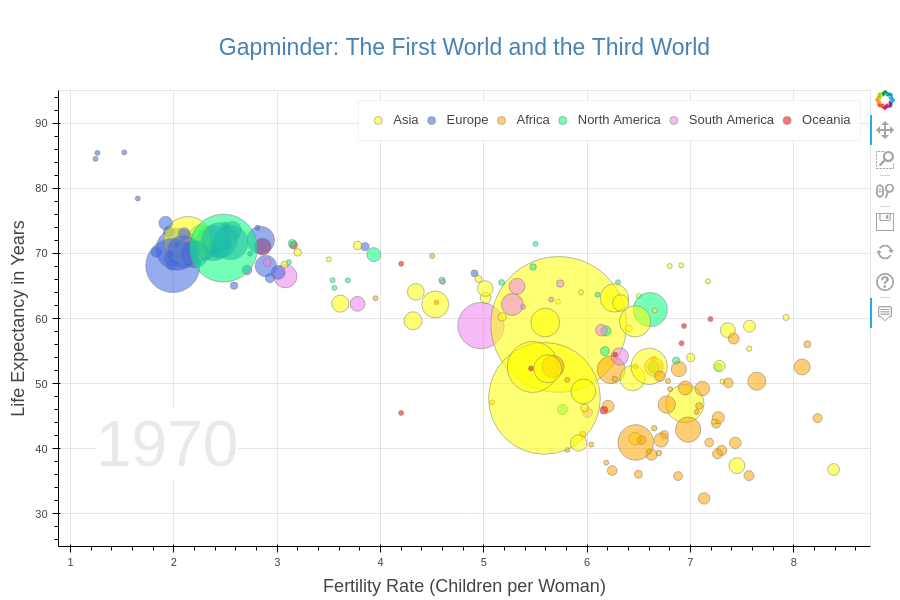

In [40]:
# Grafiko atvaizdavimas

if DISPLAY_PLOT_AS_IMAGE:
    # Export image file
    img = "plots/gapminder_snapshot_1970.png"
    img_file = export_png(p, filename=img)
    
    # Display image
    display(Image(filename=img))
else:
    show(p)

### 4.2 Gapminder Reproduction vizualizacija 1990 metams

In [41]:
# Gapminder Vizualizacija 1990 metams

## Data

YEAR = str(1990) 
country_code = df_countries["Country Code"]
country_name = df_countries["Country Name"]
country_continent = df_countries["Continent"]
color = [COLORS[continent] for continent in country_continent]
fertility = df_fertility[YEAR]
life_expectancy = df_life_expectancy[YEAR]
population = df_population[YEAR]
size = population.apply(circle_size)

source = ColumnDataSource(
    data=dict(country_code=country_code,
              country_name=country_name,
              continent = country_continent,
              color=color,
              fertility=fertility,
              life_expectancy=life_expectancy,
              size=size
             )
)

## Plot

p = figure(y_range=(25, 95), width=900, height=600, tooltips="@country_name: @life_expectancy / @fertility")
p.circle(x="fertility", y="life_expectancy", size="size",
         fill_color="color", line_color="gray", alpha=0.55, 
         legend_field="continent",
         source=source)

### Plot title
p.title = "\nGapminder: The First World and the Third World\n"
p.title.align = "center"
p.title.text_font_size = "23px"
p.title.text_font_style = "normal"
p.title.text_color = "steelblue"

### X-axis
p.add_layout(Title(text="Fertility Rate (Children per Woman)",
                   text_font_size="18px", text_font_style="normal", align="center"
                  ), "below")

### Y-axis
p.add_layout(Title(text="Life Expectancy in Years",
                   text_font_size="18px", text_font_style="normal", align="center"
                  ), "left")


### Year Label
year_label = Label(x=1.25, y=35, x_units='data', y_units='data',
                 text=YEAR, text_font_size="64px", 
                 text_color="lightgray", text_alpha=0.5,
                 render_mode='css',
                 background_fill_color='white', background_fill_alpha=1.0)


p.add_layout(year_label)

### Legend
p.legend.location = "top_right"
p.legend.orientation = "horizontal"


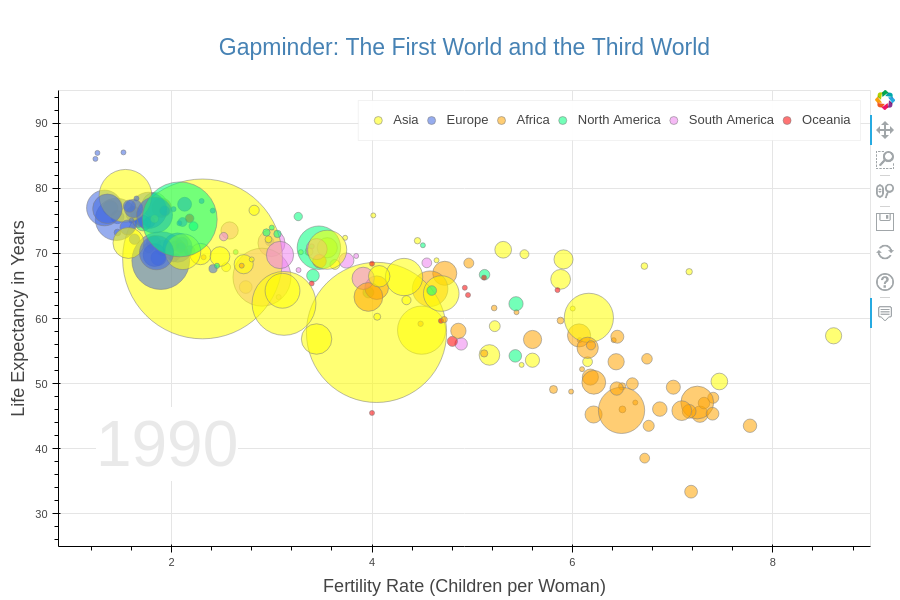

In [42]:
# Grafiko atvaizdavimas

if DISPLAY_PLOT_AS_IMAGE:
    # Export image file
    img = "plots/gapminder_snapshot_1990.png"
    img_file = export_png(p, filename=img)
    
    # Display image
    display(Image(filename=img))
else:
    show(p)

### 4.3 Gapminder Reproduction vizualizacija 2000 metams

In [43]:
# Gapminder Vizualizacija 2000 metams

## Data

YEAR = str(2000) 
country_code = df_countries["Country Code"]
country_name = df_countries["Country Name"]
country_continent = df_countries["Continent"]
color = [COLORS[continent] for continent in country_continent]

fertility = df_fertility[YEAR]
life_expectancy = df_life_expectancy[YEAR]
population = df_population[YEAR]

size = population.apply(circle_size)

source = ColumnDataSource(
    data=dict(country_code=country_code,
              country_name=country_name,
              continent = country_continent,
              color=color,
              fertility=fertility,
              life_expectancy=life_expectancy,
              size=size
             )
)

## Plot

p = figure(y_range=(30, 100), width=900, height=600, tooltips="@country_name: @life_expectancy / @fertility")
p.circle(x="fertility", y="life_expectancy", size="size",
         fill_color="color", line_color="gray", alpha=0.55, 
         legend_field="continent",
         source=source)

### Plot title
p.title = "\nGapminder: The First World and the Third World\n"
p.title.align = "center"
p.title.text_font_size = "23px"
p.title.text_font_style = "normal"
p.title.text_color = "steelblue"

### X-axis
p.add_layout(Title(text="Fertility Rate (Children per Woman)",
                   text_font_size="18px", text_font_style="normal", align="center"
                  ), "below")

### Y-axis
p.add_layout(Title(text="Life Expectancy in Years",
                   text_font_size="18px", text_font_style="normal", align="center"
                  ), "left")


### Year Label
year_label = Label(x=1.25, y=35, x_units='data', y_units='data',
                 text=YEAR, text_font_size="64px", 
                 text_color="lightgray", text_alpha=0.5,
                 render_mode='css',
                 background_fill_color='white', background_fill_alpha=1.0)


p.add_layout(year_label)

### Legend
p.legend.location = "top_right"
p.legend.orientation = "horizontal"


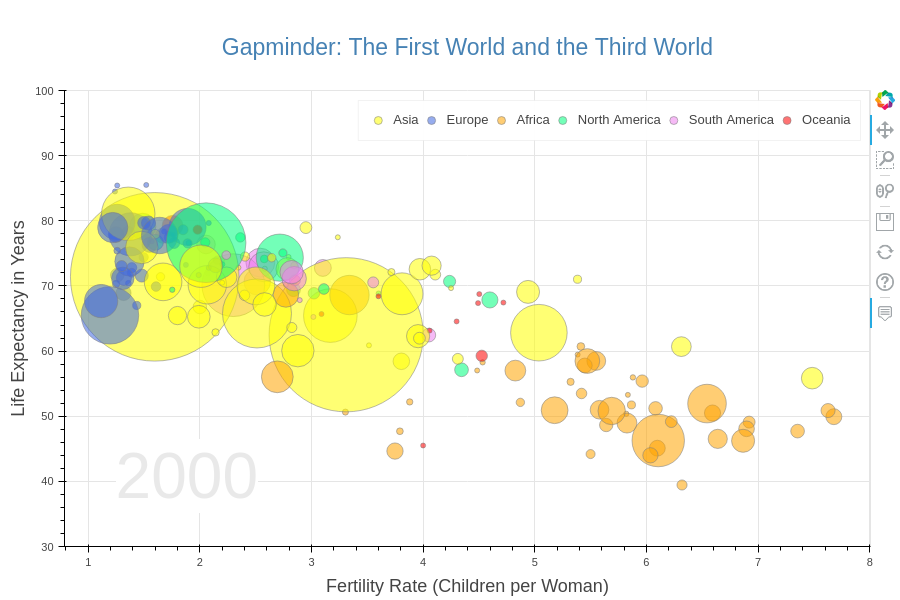

In [44]:
# Grafiko atvaizdavimas

if DISPLAY_PLOT_AS_IMAGE:
    # Export image file
    img = "plots/gapminder_snapshot_2000.png"
    img_file = export_png(p, filename=img)
    
    # Display image
    display(Image(filename=img))
else:
    show(p)

### 4.4 Gapminder Reproduction vizualizacija 2020 metams

In [45]:
# Gapminder Vizualizacija 2020 metams

## Data

YEAR = str(2020) 
country_code = df_countries["Country Code"]
country_name = df_countries["Country Name"]
country_continent = df_countries["Continent"]
color = [COLORS[continent] for continent in country_continent]

fertility = df_fertility[YEAR]
life_expectancy = df_life_expectancy[YEAR]
population = df_population[YEAR]

size = population.apply(circle_size)

source = ColumnDataSource(
    data=dict(country_code=country_code,
              country_name=country_name,
              continent = country_continent,
              color=color,
              fertility=fertility,
              life_expectancy=life_expectancy,
              size=size
             )
)

## Plot

p = figure(y_range=(25, 95), width=900, height=600, tooltips="@country_name: @life_expectancy / @fertility")
p.circle(x="fertility", y="life_expectancy", size="size",
         fill_color="color", line_color="gray", alpha=0.55, 
         legend_field="continent",
         source=source)

### Plot title
p.title = "\nGapminder: The First World and the Third World\n"
p.title.align = "center"
p.title.text_font_size = "23px"
p.title.text_font_style = "normal"
p.title.text_color = "steelblue"

### X-axis
p.add_layout(Title(text="Fertility Rate (Children per Woman)",
                   text_font_size="18px", text_font_style="normal", align="center"
                  ), "below")

### Y-axis
p.add_layout(Title(text="Life Expectancy in Years",
                   text_font_size="18px", text_font_style="normal", align="center"
                  ), "left")


### Year Label
year_label = Label(x=1.25, y=35, x_units='data', y_units='data',
                 text=YEAR, text_font_size="64px", 
                 text_color="lightgray", text_alpha=0.5,
                 render_mode='css',
                 background_fill_color='white', background_fill_alpha=1.0)


p.add_layout(year_label)

### Legend
p.legend.location = "top_right"
p.legend.orientation = "horizontal"


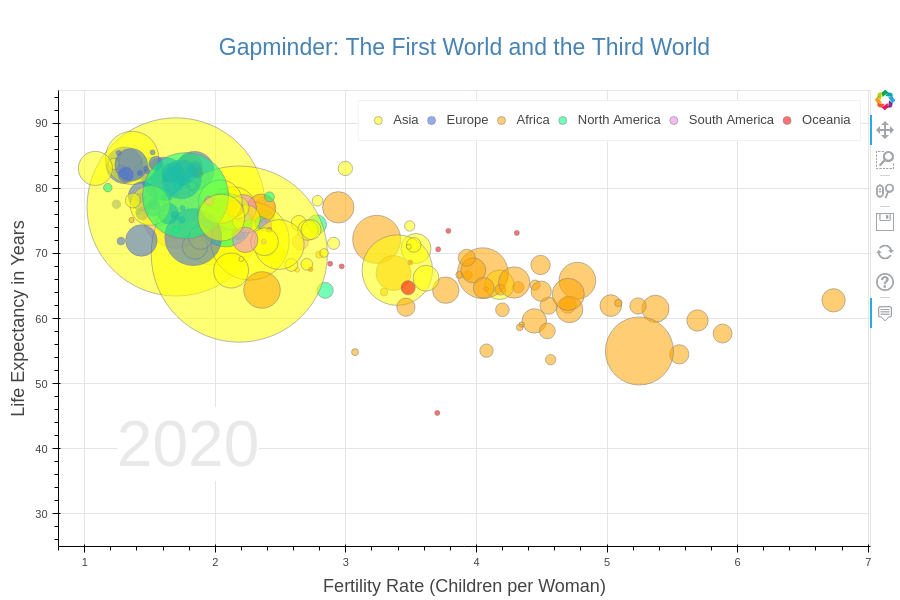

In [46]:
# Grafiko atvaizdavimas

if DISPLAY_PLOT_AS_IMAGE:
    # Export image file
    img = "plots/gapminder_snapshot_2020.png"
    img_file = export_png(p, filename=img)
    
    # Display image
    display(Image(filename=img))
else:
    show(p)